# Imports

In [327]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from anon import id2nome, nome2id, experimental_list, control_list

pd.set_option('display.max_columns', None)

# Pré-teste e Pós-teste

In [328]:
nome2id_lower = {k.lower(): v for k, v in nome2id.items()}

In [329]:
data_path = Path('../data')

experimento = pd.read_excel(data_path / 'experiment_Anon.xlsx')
pre_teste_df = pd.read_excel(data_path / 'KnowledgeAssessment_pre_Anon.xlsx')
pos_teste_df = pd.read_excel(data_path / 'KnowledgeAssessment_post_Anon.xlsx')

pre_teste_df.head(2)

,Carimbo de data/hora,Qual o seu nome?,Como funciona um ataque de Injection?,Quais são as consequências de uma falha criptográfica em uma aplicação web?,"Relacione corretamente as vulnerabilidades com os padrões de segurança correspondentes, escolhendo a alternativa correta:",Como se prevenir de um ataque de Violação/Quebra do Controle de Acesso?,"Sobre injeção de SQL e segurança em bancos de dados, responda: Um sistema web armazena credenciais de usuários em um banco de dados. Qual das seguintes abordagens ainda pode ser vulnerável a um ataque de injeção de SQL, mesmo que pareça segura?",Por que o registro e o monitoramento de atividades são fundamentais para a segurança de um sistema?,"Sobre falhas criptográficas e armazenamento seguro de credenciais, responda: Em relação ao armazenamento de senhas, qual das abordagens abaixo representa a melhor prática em termos de segurança?",Sobre quebra de controle de acesso. Qual das seguintes configurações pode levar a uma vulnerabilidade de quebra de controle de acesso em um sistema web?,"Após um ataque em uma plataforma de e-commerce, onde dados de pagamento dos clientes foram alterados por um atacante, qual seria a melhor prática para evitar falhas de integridade de dados?","Em uma empresa, um sistema de controle de versões foi comprometido devido à falta de verificação da autenticidade do código. O que poderia ser feito para melhorar a integridade do software e proteger contra modificações não autorizadas?","Em um site de e-commerce, um usuário altera o ID na URL de sua conta de ""12345"" para ""12346"" e acessa os dados de outro usuário. Qual vulnerabilidade de segurança está ocorrendo?","Um atacante explora uma falha em um sistema de software, alterando o código-fonte ou os dados armazenados para modificar o comportamento do sistema, comprometendo sua precisão e confiabilidade. Qual vulnerabilidade está sendo explorada neste cenário?"
0,2025-02-25 15:43:50.176,P1,"Um ataque de injection ocorre quando um sistema permite que dados maliciosos sejam injetados em entradas não validadas, como formulários. Sistemas que validam e sanitizam entradas corretamente podem impedir que esses ataques sejam bem-sucedidos, protegendo a integridade dos dados e do sistema.","Vazamento de dados sensíveis, como senhas e informações pessoais.","1 → A, 2 → B, 3 → C, 4 → D",Implementação de Políticas de Privilégio Mínimo e Access Control,Validação de entrada do usuário apenas no frontend antes de enviar os dados ao servidor.,Permitem identificar atividades suspeitas e responder rapidamente a incidentes.,"Usar um algoritmo de hash forte, como bcrypt, Argon2 ou PBKDF2, com um salt único para cada senha.",Implementação de controle de acesso no frontend sem reforço no backend.,"Implementar criptografia robusta de dados sensíveis, como números de cartão de crédito, e usar autenticação multifatorial para acesso administrativo.","Implementar assinaturas digitais no código-fonte e usar um sistema de controle de versões que registre todas as alterações, com auditoria rigorosa.",Broken Access Control,Manipulação de código ou dados (exploiting software integrity)
1,2025-02-25 15:44:59.530,P3,"Um ataque de injection ocorre quando um sistema permite que dados maliciosos sejam injetados em entradas não validadas, como formulários. Sistemas que validam e sanitizam entradas corretamente podem impedir que esses ataques sejam bem-sucedidos, protegendo a integridade dos dados e do sistema.","Vazamento de dados sensíveis, como senhas e informações pessoais.","1 → A, 2 → B, 3 → C, 4 → D",Implementação de Políticas de Privilégio Mínimo e Access Control,Validação de entrada do usuário apenas no frontend antes de enviar os dados ao servidor.,Permitem identificar atividades suspeitas e responder rapidamente a incidentes.,Armazenar senhas criptografadas com AES-256 e uma chave fixa embutida no código-fonte.,Implementação de controle de acesso no frontend sem reforço no backend.,"Implementar criptografia robusta de dados sensíveis

In [330]:
pos_teste_df.head(2)

,Carimbo de data/hora,Qual o seu nome?,Como funciona um ataque de Injection?,Quais são as consequências de uma falha criptográfica em uma aplicação web?,"Relacione corretamente as vulnerabilidades com os padrões de segurança correspondentes, escolhendo a alternativa correta:",Como se prevenir de um ataque de Violação/Quebra do Controle de Acesso?,"Sobre injeção de SQL e segurança em bancos de dados, responda: Um sistema web armazena credenciais de usuários em um banco de dados. Qual das seguintes abordagens ainda pode ser vulnerável a um ataque de injeção de SQL, mesmo que pareça segura?",Por que o registro e o monitoramento de atividades são fundamentais para a segurança de um sistema?,"Sobre falhas criptográficas e armazenamento seguro de credenciais, responda: Em relação ao armazenamento de senhas, qual das abordagens abaixo representa a melhor prática em termos de segurança?",Sobre quebra de controle de acesso. Qual das seguintes configurações pode levar a uma vulnerabilidade de quebra de controle de acesso em um sistema web?,"Após um ataque em uma plataforma de e-commerce, onde dados de pagamento dos clientes foram alterados por um atacante, qual seria a melhor prática para evitar falhas de integridade de dados?","Em uma empresa, um sistema de controle de versões foi comprometido devido à falta de verificação da autenticidade do código. O que poderia ser feito para melhorar a integridade do software e proteger contra modificações não autorizadas?","Em um site de e-commerce, um usuário altera o ID na URL de sua conta de ""12345"" para ""12346"" e acessa os dados de outro usuário. Qual vulnerabilidade de segurança está ocorrendo?","Um atacante explora uma falha em um sistema de software, alterando o código-fonte ou os dados armazenados para modificar o comportamento do sistema, comprometendo sua precisão e confiabilidade. Qual vulnerabilidade está sendo explorada neste cenário?"
0,2025-02-25 17:36:49.826,P31,"Em um ataque de injection, um atacante insere comandos maliciosos em um sistema vulnerável. Uma senha forte e complexa pode impedir que isso aconteça, pois ela adiciona uma camada de segurança extra, dificultando a execução de injeções.","Vazamento de dados sensíveis, como senhas e informações pessoais.","1 → A, 2 → B, 3 → C, 4 → D",Implementação de Políticas de Privilégio Mínimo e Access Control,Não sei,Permitem identificar atividades suspeitas e responder rapidamente a incidentes.,"Usar um algoritmo de hash forte, como bcrypt, Argon2 ou PBKDF2, com um salt único para cada senha.",Implementação de controle de acesso no frontend sem reforço no backend.,"Implementar criptografia robusta de dados sensíveis, como números de cartão de crédito, e usar autenticação multifatorial para acesso administrativo.","Implementar assinaturas digitais no código-fonte e usar um sistema de controle de versões que registre todas as alterações, com auditoria rigorosa.",Broken Access Control,Manipulação de código ou dados (exploiting software integrity)
1,2025-02-25 17:38:24.431,P11,"Em um ataque de injection, um atacante insere comandos maliciosos em um sistema vulnerável. Uma senha forte e complexa pode impedir que isso aconteça, pois ela adiciona uma camada de segurança extra, dificultando a execução de injeções.","Vazamento de dados sensíveis, como senhas e informações pessoais.","1 → A, 2 → B, 3 → C, 4 → D",Implementação de Políticas de Privilégio Mínimo e Access Control,Uso de stored procedures que não concatenam entradas do usuário diretamente em comandos SQL.,Substituem a necessidade de autenticação multifator (MFA).,"Armazenar as senhas em texto plano, mas protegidas por um firewall e acesso restrito ao banco de dados.",Implementação de controle de acesso no frontend sem reforço no backend.,"Implementar criptografia robusta de dados sensíveis, como números de cartão de crédito, e usar autenticação multifatorial para acesso administrativo.",Armazenar o código-fonte em servidores públicos para garantir acesso fácil e rápido.,CSRF,Man

In [331]:
caracterizacao = pd.read_excel(data_path / "CaracterizationForm_Anon.xlsx")
caracterizacao.head()

,Carimbo de data/hora,Qual o seu nome?,Qual a sua idade?,Qual é o seu gênero?,Qual é o seu curso de graduação?,Em qual semestre/período acadêmico você está atualmente?,Você trabalha atualmente na indústria de software ou em projetos de pesquisa e desenvolvimento (P&D) na área?,Como você autoavalia seu nível de conhecimento em desenvolvimento de sistemas para web?,Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?,Como você autoavalia seu nível de conhecimento em vulnerabilidades de segurança para sistemas web?,Como você autoavalia seu nível de conhecimento em padrões de segurança para mitigar vulnerabilidades em sistemas web?
0,2025-02-22 15:44:38.313,P1,20,Homem,Analise e Desenvolvimento de Sistemas,4º semestre/período,"Sim, em ambos",Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Eu participei de exercícios práticos em sala de aula.
1,2025-02-22 15:46:48.979,P2,20,Homem,Segurança da Informação,4º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.
2,2025-02-22 15:48:11.152,P3,20,Homem,Analise e Desenvolvimento de Sistemas,6º semestre/período,"Sim, em projetos de pesquisa e desenvolvimento",Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.
3,2025-02-22 15:48:21.821,P4,21,Homem,Analise e Desenvolvimento de Sistemas,6º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Eu não tenho familiaridade prévia com isso.
4,2025-02-22 15:48:30.478,P5,20,Mulher,Analise e Desenvolvimento de Sistemas,4º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.


In [332]:
len(caracterizacao)

41

In [333]:
caracterizacao['Como você autoavalia seu nível de conhecimento em desenvolvimento de sistemas para web?'].value_counts()

Como você autoavalia seu nível de conhecimento em desenvolvimento de sistemas para web?
Eu participei de exercícios práticos em sala de aula.                       17
Eu tive aulas sobre isso.                                                    9
Eu não tenho familiaridade prévia com isso.                                  7
Eu apliquei isso em um projeto industrial.                                   5
Eu realizei pesquisas prévias em fontes da literatura e recursos online.     3
Name: count, dtype: int64

In [334]:
caracterizacao['Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?'].value_counts()

Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?
Eu tive aulas sobre isso.                                                   25
Eu participei de exercícios práticos em sala de aula.                       11
Eu realizei pesquisas prévias em fontes da literatura e recursos online.     3
Eu não tenho familiaridade prévia com isso.                                  1
Eu apliquei isso em um projeto industrial.                                   1
Name: count, dtype: int64

In [335]:
def question_map(x):
    if x in ['Eu tive aulas sobre isso.', 'Eu participei de exercícios práticos em sala de aula.', 'Eu realizei pesquisas prévias em fontes da literatura e recursos online.']:
        return 'Medium'
    elif x in ['Eu não tenho familiaridade prévia com isso.']:
        return 'Low'
    else:
        return 'High'

In [336]:
caracterizacao['Como você autoavalia seu nível de conhecimento em vulnerabilidades de segurança para sistemas web?'].value_counts()

Como você autoavalia seu nível de conhecimento em vulnerabilidades de segurança para sistemas web?
Eu tive aulas sobre isso.                                                   24
Eu participei de exercícios práticos em sala de aula.                        6
Eu realizei pesquisas prévias em fontes da literatura e recursos online.     5
Eu não tenho familiaridade prévia com isso.                                  5
Eu apliquei isso em um projeto industrial.                                   1
Name: count, dtype: int64

In [337]:
caracterizacao['Como você autoavalia seu nível de conhecimento em padrões de segurança para mitigar vulnerabilidades em sistemas web?'].value_counts()

Como você autoavalia seu nível de conhecimento em padrões de segurança para mitigar vulnerabilidades em sistemas web?
Eu tive aulas sobre isso.                                                   21
Eu realizei pesquisas prévias em fontes da literatura e recursos online.     8
Eu não tenho familiaridade prévia com isso.                                  7
Eu participei de exercícios práticos em sala de aula.                        5
Name: count, dtype: int64

In [338]:
def get_acertos(df):
    df = df.copy()
    c = ['Carimbo de data/hora', 'Qual o seu nome?']
    c.extend([f'Q{i}' for i in range(1, 13)])

    df.columns = c

    def acertou_q1(row):
        return row['Q1'] == 'Um ataque de injection ocorre quando um sistema permite que dados maliciosos sejam injetados em entradas não validadas, como formulários. Sistemas que validam e sanitizam entradas corretamente podem impedir que esses ataques sejam bem-sucedidos, protegendo a integridade dos dados e do sistema.'

    def acertou_q2(row):
        return row['Q2'] == 'Vazamento de dados sensíveis, como senhas e informações pessoais.'

    def acertou_q3(row):
        return row['Q3'] == '1 → A, 2 → B, 3 → C, 4 → D'

    def acertou_q4(row):
        return row['Q4'] == 'Implementação de Políticas de Privilégio Mínimo e Access Control'

    def acertou_q5(row):
        return row['Q5'] == 'Validação de entrada do usuário apenas no frontend antes de enviar os dados ao servidor.'

    def acertou_q6(row):
        return row['Q6'] == 'Permitem identificar atividades suspeitas e responder rapidamente a incidentes.'

    def acertou_q7(row):
        return row['Q7'] == 'Usar um algoritmo de hash forte, como bcrypt, Argon2 ou PBKDF2, com um salt único para cada senha.'

    def acertou_q8(row):
        return row['Q8'] == 'Implementação de controle de acesso no frontend sem reforço no backend.'

    def acertou_q9(row):
        return row['Q9'] == 'Implementar criptografia robusta de dados sensíveis, como números de cartão de crédito, e usar autenticação multifatorial para acesso administrativo.'

    def acertou_q10(row):
        return row['Q10'] == 'Implementar assinaturas digitais no código-fonte e usar um sistema de controle de versões que registre todas as alterações, com auditoria rigorosa.'

    def acertou_q11(row):
        return row['Q11'] == 'Broken Access Control'

    def acertou_q12(row):
        return row['Q12'] == 'Manipulação de código ou dados (exploiting software integrity)'

    df['acertou_q1'] = df.apply(acertou_q1, axis=1)
    df['acertou_q2'] = df.apply(acertou_q2, axis=1)
    df['acertou_q3'] = df.apply(acertou_q3, axis=1)
    df['acertou_q4'] = df.apply(acertou_q4, axis=1)
    df['acertou_q5'] = df.apply(acertou_q5, axis=1)
    df['acertou_q6'] = df.apply(acertou_q6, axis=1)
    df['acertou_q7'] = df.apply(acertou_q7, axis=1)
    df['acertou_q8'] = df.apply(acertou_q8, axis=1)
    df['acertou_q9'] = df.apply(acertou_q9, axis=1)
    df['acertou_q10'] = df.apply(acertou_q10, axis=1)
    df['acertou_q11'] = df.apply(acertou_q11, axis=1)
    df['acertou_q12'] = df.apply(acertou_q12, axis=1)

    acertos_colunas = [f'acertou_q{i}' for i in range(1, 13)]
    df['acertos'] = df[acertos_colunas].sum(axis=1)
    results = df[['Qual o seu nome?', 'acertos']].copy()
    results.columns = ['Nome', 'Acertos']

    return results

In [339]:
acertos_pos = get_acertos(pos_teste_df)
acertos_pos

,Nome,Acertos
0,P31,10
1,P11,6
2,P4,3
3,P8,7
4,P23,9
5,P18,7
6,P29,11
7,P3,12
8,P5,9
9,P32,8


In [340]:
#participantes do pre-teste que estão no pos-teste
mesmos_participantes = pre_teste_df[pre_teste_df["Qual o seu nome?"].isin(pos_teste_df["Qual o seu nome?"])].copy()
mesmos_participantes.head(2)

,Carimbo de data/hora,Qual o seu nome?,Como funciona um ataque de Injection?,Quais são as consequências de uma falha criptográfica em uma aplicação web?,"Relacione corretamente as vulnerabilidades com os padrões de segurança correspondentes, escolhendo a alternativa correta:",Como se prevenir de um ataque de Violação/Quebra do Controle de Acesso?,"Sobre injeção de SQL e segurança em bancos de dados, responda: Um sistema web armazena credenciais de usuários em um banco de dados. Qual das seguintes abordagens ainda pode ser vulnerável a um ataque de injeção de SQL, mesmo que pareça segura?",Por que o registro e o monitoramento de atividades são fundamentais para a segurança de um sistema?,"Sobre falhas criptográficas e armazenamento seguro de credenciais, responda: Em relação ao armazenamento de senhas, qual das abordagens abaixo representa a melhor prática em termos de segurança?",Sobre quebra de controle de acesso. Qual das seguintes configurações pode levar a uma vulnerabilidade de quebra de controle de acesso em um sistema web?,"Após um ataque em uma plataforma de e-commerce, onde dados de pagamento dos clientes foram alterados por um atacante, qual seria a melhor prática para evitar falhas de integridade de dados?","Em uma empresa, um sistema de controle de versões foi comprometido devido à falta de verificação da autenticidade do código. O que poderia ser feito para melhorar a integridade do software e proteger contra modificações não autorizadas?","Em um site de e-commerce, um usuário altera o ID na URL de sua conta de ""12345"" para ""12346"" e acessa os dados de outro usuário. Qual vulnerabilidade de segurança está ocorrendo?","Um atacante explora uma falha em um sistema de software, alterando o código-fonte ou os dados armazenados para modificar o comportamento do sistema, comprometendo sua precisão e confiabilidade. Qual vulnerabilidade está sendo explorada neste cenário?"
1,2025-02-25 15:44:59.530,P3,"Um ataque de injection ocorre quando um sistema permite que dados maliciosos sejam injetados em entradas não validadas, como formulários. Sistemas que validam e sanitizam entradas corretamente podem impedir que esses ataques sejam bem-sucedidos, protegendo a integridade dos dados e do sistema.","Vazamento de dados sensíveis, como senhas e informações pessoais.","1 → A, 2 → B, 3 → C, 4 → D",Implementação de Políticas de Privilégio Mínimo e Access Control,Validação de entrada do usuário apenas no frontend antes de enviar os dados ao servidor.,Permitem identificar atividades suspeitas e responder rapidamente a incidentes.,Armazenar senhas criptografadas com AES-256 e uma chave fixa embutida no código-fonte.,Implementação de controle de acesso no frontend sem reforço no backend.,"Implementar criptografia robusta de dados sensíveis, como números de cartão de crédito, e usar autenticação multifatorial para acesso administrativo.","Implementar assinaturas digitais no código-fonte e usar um sistema de controle de versões que registre todas as alterações, com auditoria rigorosa.",Broken Access Control,Manipulação de código ou dados (exploiting software integrity)
5,2025-02-25 15:45:38.852,P13,"Um ataque de injection ocorre quando um sistema permite que dados maliciosos sejam injetados em entradas não validadas, como formulários. Sistemas que validam e sanitizam entradas corretamente podem impedir que esses ataques sejam bem-sucedidos, protegendo a integridade dos dados e do sistema.","Vazamento de dados sensíveis, como senhas e informações pessoais.","1 → A, 2 → B, 3 → C, 4 → D",Implementação de Políticas de Privilégio Mínimo e Access Control,Uso de consultas parametrizadas (prepared statements) com a verificação de tipos das entradas do usuário.,Permitem identificar atividades suspeitas e responder rapidamente a incidentes.,"Usar um algoritmo de hash forte, como bcrypt, Argon2 ou PBKDF2, com um salt único para cada senha.",Implementação de controle de acesso no frontend sem reforço no backend.,"Implementar criptografia robusta 

In [341]:
acertos_pre = get_acertos(mesmos_participantes)
acertos_pre

,Nome,Acertos
1,P3,11
5,P13,10
6,P29,9
9,P41,8
13,P23,9
14,P32,7
15,P8,9
18,P7,10
20,P18,8
21,P31,10


In [342]:
juntos = pd.merge(acertos_pre, acertos_pos[['Nome', 'Acertos']], on='Nome', suffixes=('_pos_aula', '_pos_jogo'))
juntos

,Nome,Acertos_pos_aula,Acertos_pos_jogo
0,P3,11,12
1,P13,10,12
2,P29,9,11
3,P41,8,8
4,P23,9,9
5,P32,7,8
6,P8,9,7
7,P7,10,9
8,P18,8,7
9,P31,10,10


### Verificando a normalidade

In [343]:
juntos["Diferenca"] = juntos["Acertos_pos_jogo"] - juntos["Acertos_pos_aula"]

#teste de normalidade
shapiro_test = stats.shapiro(juntos["Diferenca"])
print(f"Shapiro-Wilk p-valor: {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("As diferenças seguem uma distribuição aproximadamente normal. Podemos usar o teste t pareado.")
else:
    print("As diferenças não seguem uma distribuição normal.")

Shapiro-Wilk p-valor: 0.2180
As diferenças seguem uma distribuição aproximadamente normal. Podemos usar o teste t pareado.


In [344]:
juntos["Diferenca"]

0     1
1     2
2     2
3     0
4     0
5     1
6    -2
7    -1
8    -1
9     0
10    2
11    0
12    1
13    0
14   -1
15    1
Name: Diferenca, dtype: int64

In [345]:
juntos['Diferenca'].values

array([ 1,  2,  2,  0,  0,  1, -2, -1, -1,  0,  2,  0,  1,  0, -1,  1],
      dtype=int64)

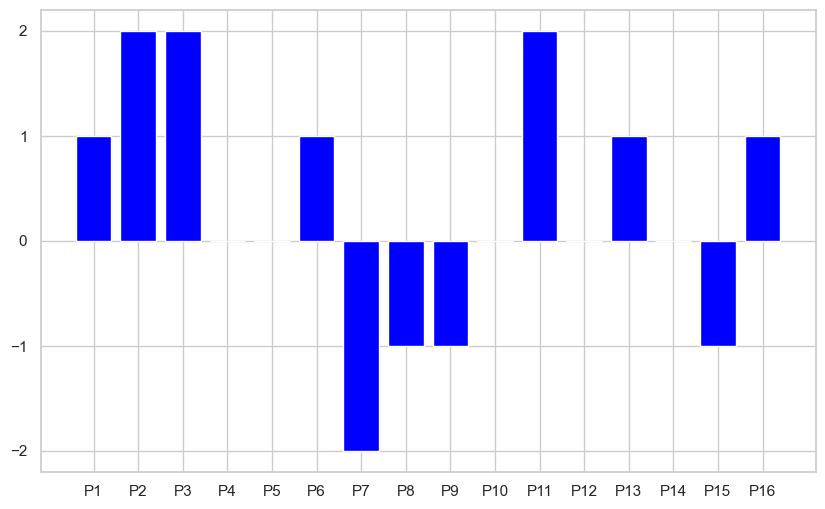

In [346]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=[f"P{i}" for i in range(1, 17)], height=juntos['Diferenca'].values, color='blue')
# ax.set_xticks(ticks=np.arange(0, len(juntos['Diferenca'])), labels=[f"P{i}" for i in range(1, 17)])
ax.set_yticks(ticks=[-2, -1, 0, 1, 2])
# sns.despine(left=True)
plt.show()

In [347]:
print("Numero de participantes:", len(juntos))
print("Numero de participantes que acertaram mais no jogo:", len(juntos[juntos["Diferenca"] > 0]))
print("Numero de participantes que acertaram mais na aula:", len(juntos[juntos["Diferenca"] < 0]))
print("Numero de participantes que acertaram o mesmo número de perguntas:", len(juntos[juntos["Diferenca"] == 0]))

Numero de participantes: 16
Numero de participantes que acertaram mais no jogo: 7
Numero de participantes que acertaram mais na aula: 4
Numero de participantes que acertaram o mesmo número de perguntas: 5


### Análise de IRA

In [348]:
juntos.head()

,Nome,Acertos_pos_aula,Acertos_pos_jogo,Diferenca
0,P3,11,12,1
1,P13,10,12,2
2,P29,9,11,2
3,P41,8,8,0
4,P23,9,9,0


In [349]:
juntos['Nome'] = juntos["Nome"].str.lower().str.strip()
juntos = juntos.sort_values(by='Nome')

juntos

,Nome,Acertos_pos_aula,Acertos_pos_jogo,Diferenca
14,p11,7,6,-1
1,p13,10,12,2
15,p16,6,7,1
8,p18,8,7,-1
4,p23,9,9,0
2,p29,9,11,2
0,p3,11,12,1
9,p31,10,10,0
5,p32,7,8,1
10,p33,9,11,2


In [350]:
experimento_exp = experimento[experimento['Grupo'] == 'Experimental'].copy()
experimento_exp['Nome'] = experimento_exp['Nome'].str.lower().str.strip()
experimento_exp = experimento_exp.sort_values(by='Nome')
# experimento_exp

In [351]:
juntos = juntos.merge(experimento_exp[['Nome', 'Curso', 'Nota do IRA Individual', 'Faixa IRA']], how='left', on='Nome')
juntos

,Nome,Acertos_pos_aula,Acertos_pos_jogo,Diferenca,Curso,Nota do IRA Individual,Faixa IRA
0,p11,7,6,-1,Analise e Desenvolvimento de Sistemas,7.7467,Baixo
1,p13,10,12,2,Segurança da Informação,7.4241,Baixo
2,p16,6,7,1,Segurança da Informação,7.2827,Baixo
3,p18,8,7,-1,Segurança da Informação,8.5767,Alto
4,p23,9,9,0,Analise e Desenvolvimento de Sistemas,8.4547,Alto
5,p29,9,11,2,Segurança da Informação,8.3000,Alto
6,p3,11,12,1,Analise e Desenvolvimento de Sistemas,9.3787,Alto
7,p31,10,10,0,Analise e Desenvolvimento de Sistemas,8.6633,Alto
8,p32,7,8,1,Analise e Desenvolvimento de Sistemas,7.6987,Baixo
9,p33,9,11,2,Analise e Desenvolvimento de Sistemas,7.8614,Baixo


#### Verificando diferenças por ira

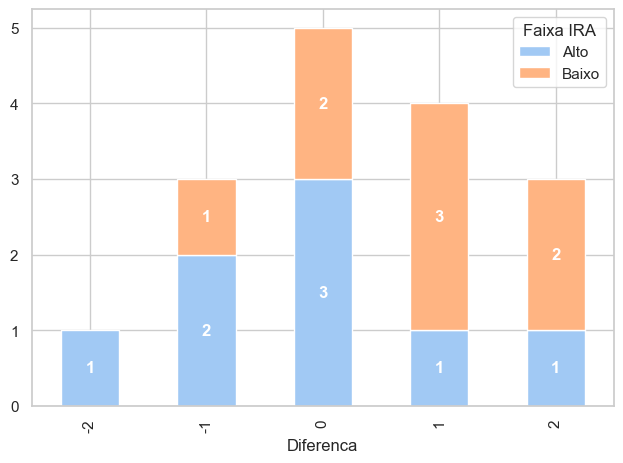

In [352]:
ax = pd.crosstab(index=juntos['Diferenca'], columns=juntos["Faixa IRA"]).plot(kind='bar', stacked=True)

# Adicionando os rótulos
for container in ax.containers:
    # Adiciona rótulo apenas se o valor for maior que 0
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.tight_layout()
plt.show()

- uma pessoa com ira alto diminuiu a pontuação em 2;
- duas pessoas com ira alto e uma com ira baixo diminuiram a pontuação em 1;
- 3 das 4 pessoas que aumentaram a pontuação em 1 tinham ira baixo, indicando que o jogo ajudou pessoas com ira baixo;
- o mesmo acontece com pessoa que aumentaram a pontuação em 2, com 2 das 3 pessoas tendo ira baixo.

#### Verificando diferenças por Curso

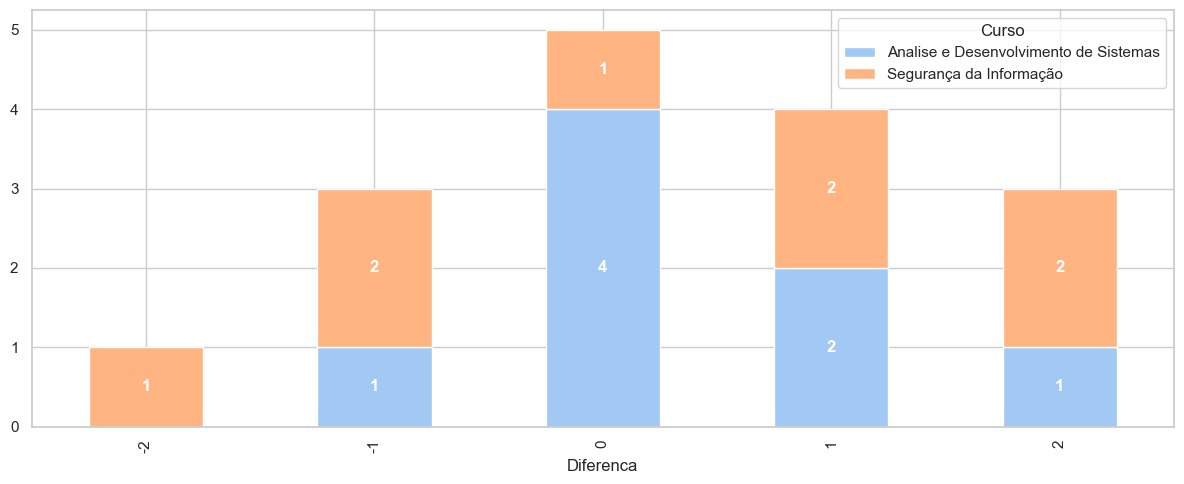

In [353]:
ax = pd.crosstab(index=juntos['Diferenca'], columns=juntos["Curso"]).plot(kind='bar', stacked=True, figsize=(12, 5))

# Adicionando os rótulos
for container in ax.containers:
    # Adiciona rótulo apenas se o valor for maior que 0
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.tight_layout()
plt.show()

- uma pessoa de si diminuiu a pontuação em 2;
- 2 das 3 pessoas que diminuiram a pontuação em 1 eram de si;
- 4 das 5 pessoas que manteram a pontuação eram de ADS;
- 2 das 3 pessoas que aumentaram a pontuação eram de si

### Realizando o teste

Há uma diferença significativa entre as médias das duas condições(antes e depois do teste)?

- **H₀ (Hipótese Nula):** A média das diferenças entre os pares é zero (𝜇𝑑 = 0). Ou seja, não há impacto significativo do jogo nos acertos.
- **H₁ (Hipótese Alternativa):** A média das diferenças entre os pares é diferente de zero (𝜇𝑑 ≠ 0). Ou seja, o jogo teve um impacto nos acertos.

In [354]:
#teste t pareado
t_stat, p_value = stats.ttest_rel(juntos["Acertos_pos_jogo"], juntos["Acertos_pos_aula"])

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Houve uma diferença significativa nos acertos antes e depois do jogo.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de diferença significativa nos acertos antes e depois do jogo.")


t-statistic: 1.0456
p-value: 0.3123
Não rejeitamos a hipótese nula. Não há evidências de diferença significativa nos acertos antes e depois do jogo.


In [355]:
# impacto real do jogo, não apenas se há diferença.

diff = juntos["Acertos_pos_jogo"] - juntos["Acertos_pos_aula"]

cohen_d = np.mean(diff) / np.std(diff, ddof=1)
print(f"Tamanho do efeito (Cohen’s d): {cohen_d:.4f}")

Tamanho do efeito (Cohen’s d): 0.2614


Como o tamanho do efeito foi de 0.2614, isso significa que, mesmo que houvesse uma pequena diferença, o efeito é fraco, ou seja, o impacto prático é pequeno (o impacto do jogo no desempenho dos jogadores foi mínimo).

analisar o ira, achar uma maneira de identificar os participantes, p1, p2 etc

### Utilizando o wilcoxon

In [356]:
#teste t pareado
t_stat, p_value = stats.wilcoxon(juntos["Acertos_pos_jogo"], juntos["Acertos_pos_aula"])

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Houve uma diferença significativa nos acertos antes e depois do jogo.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de diferença significativa nos acertos antes e depois do jogo.")

t-statistic: 21.5000
p-value: 0.2903
Não rejeitamos a hipótese nula. Não há evidências de diferença significativa nos acertos antes e depois do jogo.


## Controle X Experimental

In [357]:
controle = pre_teste_df[~pre_teste_df["Qual o seu nome?"].isin(pos_teste_df["Qual o seu nome?"])].copy()
experimental = pos_teste_df.copy()

In [358]:
controle = controle.drop([2, 7, 19, 33], axis=0) # pessoas que desistiram do experimento

In [359]:
acertos_controle = get_acertos(controle)
acertos_controle

,Nome,Acertos
0,P1,12
3,P6,9
4,P36,12
8,P14,11
10,P2,9
11,P39,8
12,P19,11
16,P27,9
17,P26,12
22,P9,10


In [360]:
acertos_experimental = get_acertos(experimental)
acertos_experimental

,Nome,Acertos
0,P31,10
1,P11,6
2,P4,3
3,P8,7
4,P23,9
5,P18,7
6,P29,11
7,P3,12
8,P5,9
9,P32,8


In [361]:
media_controle = acertos_controle['Acertos'].mean()
media_experimental = acertos_experimental['Acertos'].mean()

print(f"Média do grupo controle: {media_controle:.2f}")
print(f"Média do grupo experimental: {media_experimental:.2f}")

Média do grupo controle: 10.12
Média do grupo experimental: 8.75


In [362]:
experimento['Nome'] = experimento['Nome'].str.strip().str.lower()
acertos_controle['Nome'] = acertos_controle['Nome'].str.strip().str.lower()
acertos_experimental['Nome'] = acertos_experimental['Nome'].str.strip().str.lower()


ira_controle = experimento.loc[experimento['Grupo'] == 'Controle'].sort_values(by='Nome')
ira_experimental = experimento.loc[experimento['Grupo'] == 'Experimental'].sort_values(by='Nome')

ira_controle

,Nome,Curso,Nota do IRA Individual,Faixa IRA,Grupo
3,p1,Analise e Desenvolvimento de Sistemas,9.2067,Alto,Controle
12,p12,Segurança da Informação,8.6600,Alto,Controle
4,p14,Analise e Desenvolvimento de Sistemas,8.2627,Baixo,Controle
7,p17,Analise e Desenvolvimento de Sistemas,7.2179,Baixo,Controle
11,p19,Analise e Desenvolvimento de Sistemas,8.0821,Baixo,Controle
1,p2,Segurança da Informação,8.5433,Alto,Controle
0,p20,Analise e Desenvolvimento de Sistemas,8.1400,Baixo,Controle
10,p26,Analise e Desenvolvimento de Sistemas,9.2233,Alto,Controle
5,p27,Analise e Desenvolvimento de Sistemas,8.8600,Alto,Controle
2,p30,Segurança da Informação,8.7720,Alto,Controle


In [363]:
ira_experimental

,Nome,Curso,Nota do IRA Individual,Faixa IRA,Grupo
16,p11,Analise e Desenvolvimento de Sistemas,7.7467,Baixo,Experimental
23,p13,Segurança da Informação,7.4241,Baixo,Experimental
25,p16,Segurança da Informação,7.2827,Baixo,Experimental
17,p18,Segurança da Informação,8.5767,Alto,Experimental
31,p23,Analise e Desenvolvimento de Sistemas,8.4547,Alto,Experimental
24,p29,Segurança da Informação,8.3000,Alto,Experimental
18,p3,Analise e Desenvolvimento de Sistemas,9.3787,Alto,Experimental
20,p31,Analise e Desenvolvimento de Sistemas,8.6633,Alto,Experimental
30,p32,Analise e Desenvolvimento de Sistemas,7.6987,Baixo,Experimental
28,p33,Analise e Desenvolvimento de Sistemas,7.8614,Baixo,Experimental


### Análise do IRA

In [364]:
ira_controle['Faixa IRA'].value_counts()

Faixa IRA
Alto     8
Baixo    8
Name: count, dtype: int64

In [365]:
ira_experimental['Faixa IRA'].value_counts()

Faixa IRA
Baixo    8
Alto     8
Name: count, dtype: int64

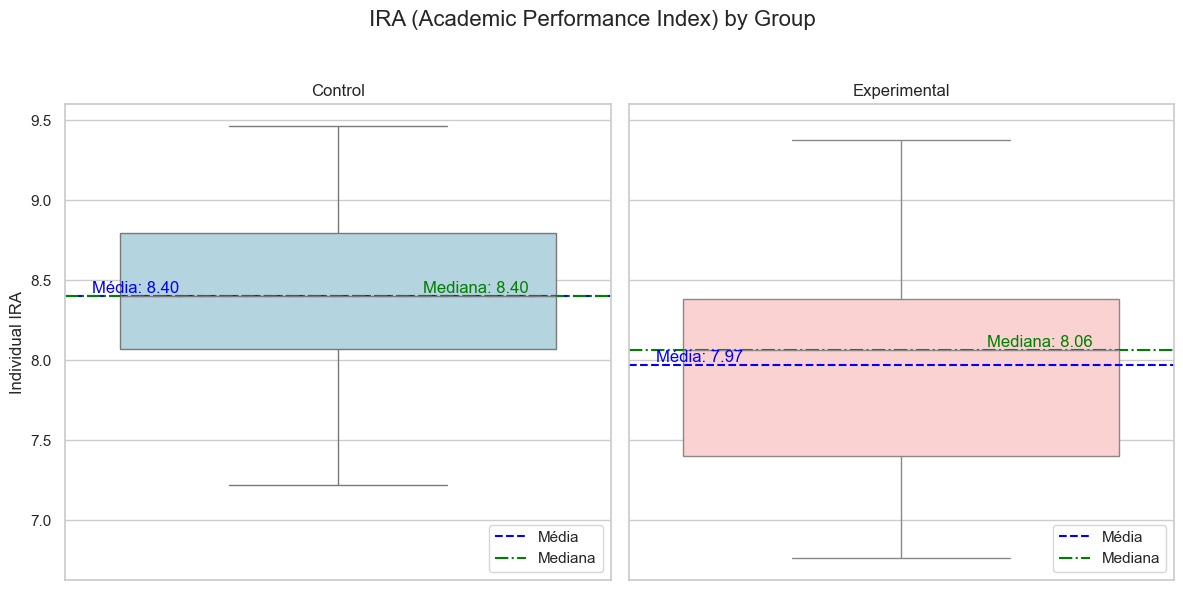

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Função para adicionar média e mediana
def add_stats(ax, data):
    mean = data['Nota do IRA Individual'].mean()
    median = data['Nota do IRA Individual'].median()
    
    ax.axhline(mean, color='blue', linestyle='--', linewidth=1.5, label='Média')
    ax.axhline(median, color='green', linestyle='-.', linewidth=1.5, label='Mediana')
    
    # Adiciona os textos em posições diferentes
    ax.text(0.05, mean, f'Média: {mean:.2f}', color='blue', va='bottom', ha='left', 
            transform=ax.get_yaxis_transform())
    ax.text(0.85, median, f'Mediana: {median:.2f}', color='green', va='bottom', ha='right', 
            transform=ax.get_yaxis_transform())

# Grupo controle
sns.boxplot(y='Nota do IRA Individual', data=ira_controle, ax=ax[0], color='#add8e6')
ax[0].set_title('Control')
add_stats(ax[0], ira_controle)

# Grupo experimental
sns.boxplot(y='Nota do IRA Individual', data=ira_experimental, ax=ax[1], color='#ffcccb')
ax[1].set_title('Experimental')
add_stats(ax[1], ira_experimental)

# Eixos e layout
for a in ax:
    a.set_ylabel('Individual IRA')
    a.set_xlabel('')
    a.legend(loc='lower right')

plt.suptitle('IRA (Academic Performance Index) by Group', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

figures_path = Path('../figures')
figures_path.mkdir(exist_ok=True)

plt.savefig(figures_path / 'ira_boxplot.pdf', dpi=300, bbox_inches='tight')
plt.show()


#### Verificando a normalidade

In [367]:
# controle
shapiro_test = stats.shapiro(acertos_controle['Acertos'])
print(f"Shapiro-Wilk p-valor (controle): {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("O grupo controle segue uma distribuição aproximadamente normal.")
else:
    print("O grupo controle não segue uma distribuição normal.")

shapiro_test = stats.shapiro(acertos_experimental['Acertos'])

print(f"Shapiro-Wilk p-valor (experimental): {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("O grupo experimental segue uma distribuição aproximadamente normal.")
else:
    print("O grupo experimental não segue uma distribuição normal.")

Shapiro-Wilk p-valor (controle): 0.0389
O grupo controle não segue uma distribuição normal.
Shapiro-Wilk p-valor (experimental): 0.3536
O grupo experimental segue uma distribuição aproximadamente normal.


- como um dus grupos não segue uma distribuição normal, usaremos um teste não paramétrico

Há uma diferença significativa entre as médias entre os grupos?

- **H₀ (Hipótese Nula):** A média das diferenças entre os grupos é zero (𝜇𝑑 = 0).
- **H₁ (Hipótese Alternativa):** A média das diferenças entre os grupos é diferente de zero (𝜇𝑑 ≠ 0).

In [368]:
u_stat, p_value = stats.mannwhitneyu(acertos_experimental['Acertos'], acertos_controle['Acertos'])

print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre as médias entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de diferença significativa entre as médias entre os grupos.")

U-statistic: 83.0000
p-value: 0.0883
Não rejeitamos a hipótese nula. Não há evidências de diferença significativa entre as médias entre os grupos.


In [369]:
# Obtendo o valor Z
z_value = stats.norm.ppf(p_value / 2)

# Calculando r
N = len(acertos_controle) + len(acertos_experimental)
r = z_value / np.sqrt(N)

print(f"r de Rank-Biserial: {r:.3f}")

r de Rank-Biserial: -0.301


In [370]:
u_stat, _ = stats.mannwhitneyu(acertos_controle['Acertos'], acertos_experimental['Acertos'])
n1, n2 = len(experimental), len(controle)
r = 1 - (2 * u_stat) / (n1 * n2)  # positivo = experimental > controle

In [371]:
r

-0.3515625

## Gain Analysis

In [372]:
juntos['Normalized_Gain'] = (juntos['Acertos_pos_jogo'] - juntos['Acertos_pos_aula']) / (12 - juntos['Acertos_pos_aula'])

def ngain_map(x):
    if -1 <= x < 0:
        return "Decrease"
    elif x == 0:
        return "Stable"
    elif 0 < x < 0.3:
        return "Low"
    elif 0.3 <= x < 0.7:
        return "Average"
    elif 0.7 <= x <= 1:
        return "High"
    else:
        return "Out of Range"
    
juntos['Normalized_Gain_Interpretation'] = juntos['Normalized_Gain'].map(ngain_map)

In [373]:
juntos

,Nome,Acertos_pos_aula,Acertos_pos_jogo,Diferenca,Curso,Nota do IRA Individual,Faixa IRA,Normalized_Gain,Normalized_Gain_Interpretation
0,p11,7,6,-1,Analise e Desenvolvimento de Sistemas,7.7467,Baixo,-0.200000,Decrease
1,p13,10,12,2,Segurança da Informação,7.4241,Baixo,1.000000,High
2,p16,6,7,1,Segurança da Informação,7.2827,Baixo,0.166667,Low
3,p18,8,7,-1,Segurança da Informação,8.5767,Alto,-0.250000,Decrease
4,p23,9,9,0,Analise e Desenvolvimento de Sistemas,8.4547,Alto,0.000000,Stable
5,p29,9,11,2,Segurança da Informação,8.3000,Alto,0.666667,Average
6,p3,11,12,1,Analise e Desenvolvimento de Sistemas,9.3787,Alto,1.000000,High
7,p31,10,10,0,Analise e Desenvolvimento de Sistemas,8.6633,Alto,0.000000,Stable
8,p32,7,8,1,Analise e Desenvolvimento de Sistemas,7.6987,Baixo,0.200000,Low
9,p33,9,11,2,Analise e Desenvolvimento de Sistemas,7.8614,Baixo,0.666667,Average


In [374]:
juntos.groupby('Faixa IRA')['Normalized_Gain_Interpretation'].value_counts().to_frame()

count
Faixa IRA Normalized_Gain_Interpretation       
Alto      Decrease                            3
          Stable                              3
          Average                             1
          High                                1
Baixo     Average                             2
          Low                                 2
          Stable                              2
          Decrease                            1
          High                                1

In [375]:
nomes = juntos.Nome.tolist()

caracterizacao_exp = caracterizacao[caracterizacao['Qual o seu nome?'].str.lower().str.strip().isin(nomes)].copy()

In [376]:
caracterizacao_exp['level'] = caracterizacao_exp['Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?'].map(question_map)
caracterizacao_exp

,Carimbo de data/hora,Qual o seu nome?,Qual a sua idade?,Qual é o seu gênero?,Qual é o seu curso de graduação?,Em qual semestre/período acadêmico você está atualmente?,Você trabalha atualmente na indústria de software ou em projetos de pesquisa e desenvolvimento (P&D) na área?,Como você autoavalia seu nível de conhecimento em desenvolvimento de sistemas para web?,Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?,Como você autoavalia seu nível de conhecimento em vulnerabilidades de segurança para sistemas web?,Como você autoavalia seu nível de conhecimento em padrões de segurança para mitigar vulnerabilidades em sistemas web?,level
2,2025-02-22 15:48:11.152,P3,20,Homem,Analise e Desenvolvimento de Sistemas,6º semestre/período,"Sim, em projetos de pesquisa e desenvolvimento",Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Medium
3,2025-02-22 15:48:21.821,P4,21,Homem,Analise e Desenvolvimento de Sistemas,6º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Eu não tenho familiaridade prévia com isso.,Medium
4,2025-02-22 15:48:30.478,P5,20,Mulher,Analise e Desenvolvimento de Sistemas,4º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Medium
6,2025-02-22 15:49:34.712,P7,24,Homem,Segurança da Informação,4º semestre/período,Não,Eu não tenho familiaridade prévia com isso.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Medium
7,2025-02-22 15:52:57.178,P8,20,Homem,Segurança da Informação,4º semestre/período,Não,Eu não tenho familiaridade prévia com isso.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Medium
10,2025-02-22 15:59:05.290,P11,20,Homem,Analise e Desenvolvimento de Sistemas,4º semestre/período,Não,Eu tive aulas sobre isso.,Eu não tenho familiaridade prévia com isso.,Eu não tenho familiaridade prévia com isso.,Eu tive aulas sobre isso.,Low
12,2025-02-22 16:03:45.361,P13,22,Homem,Segurança da Informação,6º semestre/período,"Sim, em projetos de pesquisa e desenvolvimento",Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Medium
15,2025-02-22 16:11:11.972,P16,21,Homem,Segurança da Informação,6º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Medium
17,2025-02-22 16:13:23.128,P18,22,Homem,Segurança da Informação,4º semestre/período,Não,Eu não tenho familiaridade prévia com isso.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Medium
22,2025-02-22 16:31:55.412,P23,22,Homem,Analise e Desenvolvimento de Sistemas,6º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu não tenho familiaridade prévia com isso.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Medium


In [377]:
caracterizacao_exp['Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?'].value_counts()

Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?
Eu tive aulas sobre isso.                                                   9
Eu participei de exercícios práticos em sala de aula.                       5
Eu realizei pesquisas prévias em fontes da literatura e recursos online.    1
Eu não tenho familiaridade prévia com isso.                                 1
Name: count, dtype: int64

In [378]:
juntos['Nome'] = juntos['Nome'].str.strip().str.upper()
gain_exp = pd.merge(
    juntos[["Nome", "Normalized_Gain"]],
    caracterizacao_exp[["Qual o seu nome?", "Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?"]],
    left_on="Nome",
    right_on="Qual o seu nome?",
    how="inner" 
).drop(columns=["Qual o seu nome?"]) 

In [379]:
def level_map(x):
    if x == 'Eu tive aulas sobre isso.':
        return 'Medium'
    elif x == 'Eu participei de exercícios práticos em sala de aula.':
        return 'Medium-High'
    elif x == 'Eu realizei pesquisas prévias em fontes da literatura e recursos online.':
        return 'Medium-Low'
    elif x == 'Eu não tenho familiaridade prévia com isso.':
       return 'Low'
    elif x == 'Eu apliquei isso em um projeto industrial.':
       return 'High' 


In [380]:
def categorias_map(x):
    if x in [
        'Eu não tenho familiaridade prévia com isso.',
        'Eu realizei pesquisas prévias em fontes da literatura e recursos online.',
        'Eu tive aulas sobre isso.'
    ]:
        return 'Less-experienced'
    elif x in [
        'Eu participei de exercícios práticos em sala de aula.',
        'Eu apliquei isso em um projeto industrial.'
    ]: # teve pratica no assunto
        return 'More-experienced'
    else:
        return None
    


In [381]:
pd.set_option('display.max_colwidth', None) 

#gain_exp['level'] = gain_exp[
    #'Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?'
#].map(level_map)

gain_exp['categories'] = gain_exp[
    'Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?'
].map(categorias_map)
gain_exp

,Nome,Normalized_Gain,Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?,categories
0,P11,-0.200000,Eu não tenho familiaridade prévia com isso.,Less-experienced
1,P13,1.000000,Eu participei de exercícios práticos em sala de aula.,More-experienced
2,P16,0.166667,Eu participei de exercícios práticos em sala de aula.,More-experienced
3,P18,-0.250000,Eu tive aulas sobre isso.,Less-experienced
4,P23,0.000000,Eu tive aulas sobre isso.,Less-experienced
5,P29,0.666667,Eu participei de exercícios práticos em sala de aula.,More-experienced
6,P3,1.000000,Eu tive aulas sobre isso.,Less-experienced
7,P31,0.000000,Eu tive aulas sobre isso.,Less-experienced
8,P32,0.200000,Eu participei de exercícios práticos em sala de aula.,More-experienced
9,P33,0.666667,Eu tive aulas sobre isso.,Less-experienced


Verificando a normalidade

In [382]:
less = gain_exp[gain_exp['categories'] == 'Less-experienced']['Normalized_Gain']
more = gain_exp[gain_exp['categories'] == 'More-experienced']['Normalized_Gain']

# Teste de normalidade para o grupo Less-experienced
shapiro_less = stats.shapiro(less)
print(f"Shapiro-Wilk p-valor (Less-experienced): {shapiro_less.pvalue:.4f}")
if shapiro_less.pvalue > 0.05:
    print("O grupo Less-experienced segue uma distribuição aproximadamente normal.")
else:
    print("O grupo Less-experienced não segue uma distribuição normal.")

# Teste de normalidade para o grupo More-experienced
shapiro_more = stats.shapiro(more)
print(f"Shapiro-Wilk p-valor (More-experienced): {shapiro_more.pvalue:.4f}")
if shapiro_more.pvalue > 0.05:
    print("O grupo More-experienced segue uma distribuição aproximadamente normal.")
else:
    print("O grupo More-experienced não segue uma distribuição normal.")


Shapiro-Wilk p-valor (Less-experienced): 0.4702
O grupo Less-experienced segue uma distribuição aproximadamente normal.
Shapiro-Wilk p-valor (More-experienced): 0.4093
O grupo More-experienced segue uma distribuição aproximadamente normal.


- como os dois grupos seguem uma distribuição normal, usaremos um teste t

Há uma diferença significativa entre as médias entre os grupos?

- **Hipótese Nula (H₀):**  
  O ganho médio (*Normalized_Gain*) dos grupos *Less-experienced* e *More-experienced* é igual.  
  $$
  H_0: \mu_{Less} = \mu_{More}
  $$

- **Hipótese Alternativa (H₁):**  
  O ganho médio (*Normalized_Gain*) dos grupos *Less-experienced* e *More-experienced* é diferente.  
  $$
  H_1: \mu_{Less} \neq \mu_{More}
  $$

Responde mais indiretamente


In [383]:
print("less:", less.mean())
print("more:", more.mean())

less: 0.049999999999999996
more: 0.40666666666666673


In [384]:
# Teste t  (Less-experienced vs More-experienced)
t_stat, p_value = stats.ttest_ind(less, more, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há diferença significativa no nível de conhecimento entre os grupos Less-experienced e More-experienced.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de diferença significativa no nível de conhecimento entre os grupos Less-experienced e More-experienced.")


t-statistic: -1.4983
p-value: 0.1671
Não rejeitamos a hipótese nula. Não há evidências de diferença significativa no nível de conhecimento entre os grupos Less-experienced e More-experienced.


In [385]:
# Tamanho do efeito (Cohen's d)
n1, n2 = len(less), len(more)
s1, s2 = np.std(less, ddof=1), np.std(more, ddof=1)
mean1, mean2 = np.mean(less), np.mean(more)

# Desvio padrão combinado (pooled)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))

# Cohen's d
cohen_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohen_d:.4f}")

Cohen's d: -0.7520


Como o tamanho do efeito foi de Cohen's d = -0.7148, isso indica que há uma diferença moderada a grande entre os grupos. O sinal negativo mostra que o grupo More-experienced teve desempenho maior que o Less-experienced em termos de aprendizado. Em outras palavras, o nível prévio de experiência influencia o ganho de aprendizado com o jogo — jogadores mais experientes se beneficiaram mais.

Pessoas com menos experiência aprenderam mais que pessoas com mais experiência?

- **Hipótese Nula (H₀):**  
  O ganho médio (*Normalized_Gain*) do grupo *Less-experienced* é menor ou igual ao do grupo *More-experienced*.  
  $$
  H_0: \mu_{Less} \leq \mu_{More}
  $$

- **Hipótese Alternativa (H₁):**  
  O ganho médio (*Normalized_Gain*) do grupo *Less-experienced* é maior que o do grupo *More-experienced*.  
  $$
  H_1: \mu_{Less} > \mu_{More}
  $$

**Nota:** Este é um teste t unilateral, pois a hipótese tem direção específica.


In [386]:
# Teste t unilateral (Less-experienced > More-experienced)
t_stat, p_value_two_sided = stats.ttest_ind(less, more, equal_var=False)

# Para teste unilateral, dividimos o p-valor de duas caudas
p_value_one_sided = p_value_two_sided / 2

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value (unilateral): {p_value_one_sided:.4f}")

if t_stat > 0 and p_value_one_sided < 0.05:
    print("Rejeitamos a hipótese nula. Pessoas com menos experiência aprenderam mais que as com mais experiência.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de que pessoas com menos experiência aprenderam mais que as com mais experiência.")

t-statistic: -1.4983
p-value (unilateral): 0.0835
Não rejeitamos a hipótese nula. Não há evidências de que pessoas com menos experiência aprenderam mais que as com mais experiência.


In [387]:
# Tamanho do efeito (Cohen's d)
n1, n2 = len(less), len(more)
s1, s2 = np.std(less, ddof=1), np.std(more, ddof=1)
mean1, mean2 = np.mean(less), np.mean(more)

# Desvio padrão combinado (pooled)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))

# Cohen's d
cohen_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohen_d:.4f}")

Cohen's d: -0.7520


Como o tamanho do efeito foi de Cohen's d = -0.7148, isso indica que há uma diferença moderada a grande entre os grupos. O sinal negativo mostra que o grupo More-experienced teve desempenho maior que o Less-experienced em termos de aprendizado. Em outras palavras, o nível prévio de experiência influencia o ganho de aprendizado com o jogo — jogadores mais experientes se beneficiaram mais.

Pelo IRA

In [388]:
# Separando os grupos a partir da tabela
baixo = juntos[juntos['Faixa IRA'] == 'Baixo']['Normalized_Gain']
alto = juntos[juntos['Faixa IRA'] == 'Alto']['Normalized_Gain']

# Teste de normalidade para o grupo IRA Baixo
shapiro_less = stats.shapiro(baixo)
print(f"Shapiro-Wilk p-valor (IRA Baixo): {shapiro_less.pvalue:.4f}")
if shapiro_less.pvalue > 0.05:
    print("O grupo IRA Baixo segue uma distribuição aproximadamente normal.")
else:
    print("O grupo IRA Baixo não segue uma distribuição normal.")

# Teste de normalidade para o grupo IRA Alto
shapiro_more = stats.shapiro(alto)
print(f"Shapiro-Wilk p-valor (IRA Alto): {shapiro_more.pvalue:.4f}")
if shapiro_more.pvalue > 0.05:
    print("O grupo IRA Alto segue uma distribuição aproximadamente normal.")
else:
    print("O grupo IRA Alto não segue uma distribuição normal.")


Shapiro-Wilk p-valor (IRA Baixo): 0.6031
O grupo IRA Baixo segue uma distribuição aproximadamente normal.
Shapiro-Wilk p-valor (IRA Alto): 0.4366
O grupo IRA Alto segue uma distribuição aproximadamente normal.


In [389]:
print(f"IRA Baixo:{baixo.mean()}")
print(f"IRA Alto:{alto.mean()}")

IRA Baixo:0.29166666666666663
IRA Alto:0.03125


Hipóteses para o Teste t sobre o Gain (IRA)

- **Hipótese Nula (H₀):**  
  Não há diferença no **ganho médio** (IRA) entre os grupos.  

  $$H_0: \mu_{\text{baixo}} = \mu_{\text{alto}}$$

- **Hipótese Alternativa (H₁):**  
  Há diferença no **ganho médio** entre os grupos.  

  $$H_1: \mu_{\text{baixo}} \neq \mu_{\text{alto}}$$


In [390]:
# Teste t para duas amostras independentes
t_stat, p_value = stats.ttest_ind(baixo, alto, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula (H₀). Há diferença significativa no ganho médio (IRA) entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula (H₀). Não há evidências de diferença significativa no ganho médio (IRA) entre os grupos.")

t-statistic: 1.0703
p-value: 0.3044
Não rejeitamos a hipótese nula (H₀). Não há evidências de diferença significativa no ganho médio (IRA) entre os grupos.


In [391]:
# Tamanho do efeito (Cohen's d)
n1, n2 = len(baixo), len(alto)
s1, s2 = np.std(baixo, ddof=1), np.std(alto, ddof=1)
mean1, mean2 = np.mean(baixo), np.mean(alto)

# Desvio padrão combinado (pooled)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))

# Cohen's d
cohen_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohen_d:.4f}")

Cohen's d: 0.5351


Como o tamanho do efeito foi de Cohen's d = 0.5351, isso indica que há uma diferença moderada no ganho médio (IRA) entre os grupos. O valor positivo mostra que o grupo com IRA Alto obteve ganho médio maior que o grupo baixo. Em outras palavras, o nível do IRA associado influencia o desempenho, e o impacto prático é moderado, sugerindo que as diferenças observadas no IRA são relevantes, mas não extremamente grandes.

In [392]:
desc_table = juntos.merge(gain_exp[['Nome', 'categories']], on='Nome', how='right')

desc_table.drop(['Curso', 'Nota do IRA Individual', 'Normalized_Gain_Interpretation'], axis=1, inplace=True)

def get_change(x):
    if x > 0:
        return 'Aumentou'
    elif x < 0:
        return 'Diminuiu'
    else:
        return 'Não mudou'


desc_table['Mudança'] = desc_table['Diferenca'].map(get_change)

In [393]:
desc_table['Num'] = desc_table.Nome.str.extract(r'(\d+)').astype(int)
display(desc_table.sort_values(by=['Num'], ascending=True))
desc_table.sort_values(by=['Num'], ascending=True, inplace=True)
#desc_table.sort_values(by=['Num'], ascending=True)[['Nome', 'Acertos_pos_aula', 'Acertos_pos_jogo', 'Diferenca', 'Faixa IRA', 'Normalized_Gain', 'categories', 'Mudança']].to_latex(f'desc_table.tex', index=False, escape=False)
desc_table.drop(columns=['Num'], inplace=True)

,Nome,Acertos_pos_aula,Acertos_pos_jogo,Diferenca,Faixa IRA,Normalized_Gain,categories,Mudança,Num
6,P3,11,12,1,Alto,1.000000,Less-experienced,Aumentou,3
10,P4,3,3,0,Baixo,0.000000,Less-experienced,Não mudou,4
13,P5,9,9,0,Baixo,0.000000,More-experienced,Não mudou,5
14,P7,10,9,-1,Alto,-0.500000,Less-experienced,Diminuiu,7
15,P8,9,7,-2,Alto,-0.666667,Less-experienced,Diminuiu,8
0,P11,7,6,-1,Baixo,-0.200000,Less-experienced,Diminuiu,11
1,P13,10,12,2,Baixo,1.000000,More-experienced,Aumentou,13
2,P16,6,7,1,Baixo,0.166667,More-experienced,Aumentou,16
3,P18,8,7,-1,Alto,-0.250000,Less-experienced,Diminuiu,18
4,P23,9,9,0,Alto,0.000000,Less-experienced,Não mudou,23


In [394]:
# desc_table.to_latex('s.tex')

In [395]:
pd.crosstab(desc_table['categories'], desc_table['Mudança'])

Mudança,Aumentou,Diminuiu,Não mudou
categories,,,
Less-experienced,3,4,4
More-experienced,4,0,1


In [396]:
pd.crosstab(desc_table['Faixa IRA'], desc_table['Mudança'])

Mudança,Aumentou,Diminuiu,Não mudou
Faixa IRA,,,
Alto,2,3,3
Baixo,5,1,2


## Criando uma variável que combina IRA e Experiência

In [397]:
def classify_profile(row):
    if row['categories'] == 'More-experienced' and row['Faixa IRA'] == 'Alto':
        return 'High-performance experienced'  # HPE
    elif row['categories'] == 'More-experienced' and row['Faixa IRA'] == 'Baixo':
        return 'Low-performance experienced'   # LPE
    elif row['categories'] == 'Less-experienced' and row['Faixa IRA'] == 'Alto':
        return 'High-performance novice'       # HPN
    elif row['categories'] == 'Less-experienced' and row['Faixa IRA'] == 'Baixo':
        return 'Low-performance novice'        # LPN
    else:
        return None

# Criando a nova coluna combinada
desc_table['Profile'] = desc_table.apply(classify_profile, axis=1)

In [398]:
desc_table.drop('Nome', axis=1)

,Acertos_pos_aula,Acertos_pos_jogo,Diferenca,Faixa IRA,Normalized_Gain,categories,Mudança,Profile
6,11,12,1,Alto,1.000000,Less-experienced,Aumentou,High-performance novice
10,3,3,0,Baixo,0.000000,Less-experienced,Não mudou,Low-performance novice
13,9,9,0,Baixo,0.000000,More-experienced,Não mudou,Low-performance experienced
14,10,9,-1,Alto,-0.500000,Less-experienced,Diminuiu,High-performance novice
15,9,7,-2,Alto,-0.666667,Less-experienced,Diminuiu,High-performance novice
0,7,6,-1,Baixo,-0.200000,Less-experienced,Diminuiu,Low-performance novice
1,10,12,2,Baixo,1.000000,More-experienced,Aumentou,Low-performance experienced
2,6,7,1,Baixo,0.166667,More-experienced,Aumentou,Low-performance experienced
3,8,7,-1,Alto,-0.250000,Less-experienced,Diminuiu,High-performance novice
4,9,9,0,Alto,0.000000,Less-experienced,Não mudou,High-performance novice


In [399]:
desc_table.Profile.value_counts().to_dict()

{'High-performance novice': 7,
 'Low-performance novice': 4,
 'Low-performance experienced': 4,
 'High-performance experienced': 1}

To determine whether there are statistically significant differences in normalized gain ($g$) among the four combined experience–performance profiles:

- **HPE:** High-performance experienced  
- **LPE:** Low-performance experienced  
- **HPN:** High-performance novice  
- **LPN:** Low-performance novice  

---

### 🧪 Overall Hypothesis

- **Null Hypothesis (H₀):**  
  There is no statistically significant difference in the mean normalized gain ($\mu_g$) across the four combined profiles.  

  $$ H₀: \mu_{HPE} = \mu_{LPE} = \mu_{HPN} = \mu_{LPN} $$

- **Alternative Hypothesis (H₁):**  
  At least one profile exhibits a statistically significant difference in mean normalized gain compared to the others.  

  $$ H₁: \exists \, i,j \; \text{such that} \; \mu_i \neq \mu_j $$

---

### 🔍 Pairwise Hypotheses (if omnibus test is significant)  

If the omnibus test (e.g., **ANOVA** if normality is met or **Kruskal–Wallis** otherwise) indicates a significant difference, we will proceed with **pairwise post-hoc tests** (e.g., Tukey HSD or Dunn’s test). Examples of the pairwise hypotheses include:

- **H₀₁:** $\mu_{HPE} = \mu_{LPE}$  
- **H₀₂:** $\mu_{HPE} = \mu_{HPN}$  
- **H₀₃:** $\mu_{HPE} = \mu_{LPN}$  
- **H₀₄:** $\mu_{LPE} = \mu_{HPN}$  
- **H₀₅:** $\mu_{LPE} = \mu_{LPN}$  
- **H₀₆:** $\mu_{HPN} = \mu_{LPN}$  

For each comparison, the alternative hypothesis is that the mean normalized gain differs between the two profiles.

---

In [400]:
desc_table.groupby('Profile')['Normalized_Gain'].aggregate(['mean', 'median'])

,mean,median
Profile,,
High-performance experienced,0.666667,0.666667
High-performance novice,-0.059524,0.000000
Low-performance experienced,0.341667,0.183333
Low-performance novice,0.241667,0.250000


In [401]:
from scipy.stats import kruskal

groups = []
for profile in desc_table['Profile'].unique():
    group_values = desc_table[desc_table['Profile'] == profile]['Normalized_Gain'].dropna()
    if len(group_values) > 0:
        groups.append(group_values.values)

# Kruskal–Wallis H test
stat, p = kruskal(*groups)

print(f"Kruskal–Wallis H-statistic: {stat:.4f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("✅ Reject H₀: Significant differences exist among the profiles.")
else:
    print("❌ Fail to reject H₀: No significant differences were detected among the profiles.")


Kruskal–Wallis H-statistic: 4.1221
p-value: 0.2486
❌ Fail to reject H₀: No significant differences were detected among the profiles.
